# Projeto 2 - Classificador Automático de Sentimento

Você foi contratado por uma empresa parar analisar como os clientes estão reagindo a um determinado produto no Twitter. A empresa deseja que você crie um programa que irá analisar as mensagens disponíveis e classificará como "relevante" ou "irrelevante". Com isso ela deseja que mensagens negativas, que denigrem o nome do produto, ou que mereçam destaque, disparem um foco de atenção da área de marketing.<br /><br />
Como aluno de Ciência dos Dados, você lembrou do Teorema de Bayes, mais especificamente do Classificador Naive-Bayes, que é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser relevante dadas as palavras em seu conteúdo.<br /><br />
Para realizar o MVP (*minimum viable product*) do projeto, você precisa implementar uma versão do classificador que "aprende" o que é relevante com uma base de treinamento e compara a performance dos resultados com uma base de testes.<br /><br />
Após validado, o seu protótipo poderá também capturar e classificar automaticamente as mensagens da plataforma.

## Informações do Projeto

Prazo: 13/Set até às 23:59.<br />
Grupo: 1 ou 2 pessoas.<br /><br />
Entregáveis via GitHub: 
* Arquivo notebook com o código do classificador, seguindo as orientações abaixo.
* Arquivo Excel com as bases de treinamento e teste totalmente classificado.

**NÃO disponibilizar o arquivo com os *access keys/tokens* do Twitter.**


### Check 3: 

Até o dia 06 de Setembro às 23:59, o notebook e o xlsx devem estar no Github com as seguintes evidências: 
    * Conta no twitter criada.
    * Produto escolhido.
    * Arquivo Excel contendo a base de treinamento e teste já classificado.

Sugestão de leitura:<br />
http://docs.tweepy.org/en/v3.5.0/index.html<br />
https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/

___

## Preparando o ambiente

Instalando a biblioteca *tweepy* para realizar a conexão com o Twitter:

In [396]:
%%capture

#Instalando o tweepy
!pip install tweepy

Importando as Bibliotecas que serão utilizadas. Esteja livre para adicionar outras.

In [397]:
import tweepy
import math
import os.path
import pandas as pd
import json
from random import shuffle
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import string



___
## Autenticando no  Twitter

Para realizar a captura dos dados é necessário ter uma conta cadastrada no twitter:

* Conta: ***[Preencha aqui o id da sua conta. Ex: @fulano ]***


1. Caso ainda não tenha uma: https://twitter.com/signup
1. Depois é necessário registrar um app para usar a biblioteca: https://apps.twitter.com/
1. Dentro do registro do App, na aba Keys and Access Tokens, anotar os seguintes campos:
    1. Consumer Key (API Key)
    1. Consumer Secret (API Secret)
1. Mais abaixo, gere um Token e anote também:
    1. Access Token
    1. Access Token Secret
    
1. Preencha os valores no arquivo "auth.pass"

**ATENÇÃO**: Nunca divulgue os dados desse arquivo online (GitHub, etc). Ele contém as chaves necessárias para realizar as operações no twitter de forma automática e portanto é equivalente a ser "hackeado". De posse desses dados, pessoas mal intencionadas podem fazer todas as operações manuais (tweetar, seguir, bloquear/desbloquear, listar os seguidores, etc). Para efeito do projeto, esse arquivo não precisa ser entregue!!!

In [362]:
#Dados de autenticação do twitter:

#Coloque aqui o identificador da conta no twitter: @fulano

#leitura do arquivo no formato JSON
with open('auth.pass') as fp:    
    data = json.load(fp)

#Configurando a biblioteca. Não modificar
auth = tweepy.OAuthHandler(data['consumer_key'], data['consumer_secret'])
auth.set_access_token(data['access_token'], data['access_token_secret'])

FileNotFoundError: [Errno 2] No such file or directory: 'auth.pass'

___
## Coletando Dados

Agora vamos coletar os dados. Tenha em mente que dependendo do produto escolhido, não haverá uma quantidade significativa de mensagens, ou ainda poder haver muitos retweets.<br /><br /> 
Configurando:

In [363]:
#Produto escolhido:
produto = 'PUBG'

#Quantidade mínima de mensagens capturadas:
n = 500
#Quantidade mínima de mensagens para a base de treinamento:
t = 300

#Filtro de língua, escolha uma na tabela ISO 639-1.
lang = 'pt'

Capturando os dados do twitter:

In [ ]:
#Cria um objeto para a captura
api = tweepy.API(auth)

#Inicia a captura, para mais detalhes: ver a documentação do tweepy
i = 1
msgs = []
for msg in tweepy.Cursor(api.search, q=produto, lang=lang).items():    
    msgs.append(msg.text.lower())
    i += 1
    if i > n:
        break

#Embaralhando as mensagens para reduzir um possível viés
shuffle(msgs)

Salvando os dados em uma planilha Excel:

In [ ]:
#Verifica se o arquivo não existe para não substituir um conjunto pronto
if not os.path.isfile('./{0}.xlsx'.format(produto)):
    
    #Abre o arquivo para escrita
    writer = pd.ExcelWriter('{0}.xlsx'.format(produto))

    #divide o conjunto de mensagens em duas planilhas
    dft = pd.DataFrame({'Treinamento' : pd.Series(msgs[:t])})
    dft.to_excel(excel_writer = writer, sheet_name = 'Treinamento', index = False)

    dfc = pd.DataFrame({'Teste' : pd.Series(msgs[t:])})
    dfc.to_excel(excel_writer = writer, sheet_name = 'Teste', index = False)

    #fecha o arquivo
    writer.save()

___
## Classificando as Mensagens

Agora você deve abrir o arquivo Excel com as mensagens capturadas e classificar na Coluna B se a mensagem é relevante ou não.<br /> 
Não se esqueça de colocar um nome para a coluna na célula **B1**.<br /><br />
Fazer o mesmo na planilha de Controle.

___
## Montando o Classificador Naive-Bayes

Com a base de treinamento montada, comece a desenvolver o classificador. Escreva o seu código abaixo:

Opcionalmente: 
* Limpar as mensagens removendo os caracteres: enter, :, ", ', (, ), etc. Não remover emojis.<br />
* Corrigir separação de espaços entre palavras e/ou emojis.
* Propor outras limpezas/transformações que não afetem a qualidade da informação.



In [398]:
#primeiro passo, converter em uma tabela de frequencia

dados=pd.read_excel('PUBG.xlsx')


In [399]:
dados.head()

,Treinamento,Relevancia
0,live! bora jogar?\nhttps://t.co/r7byt6hstd\n#l...,Irrelevante
1,assistindo o menino @tecnoshlol para ficar bom...,Relevante
2,rt @videogamerzbr: sorteio de uma key de battl...,Irrelevante
3,pubg time via restream.io,Irrelevante
4,rt @otiozero: último dia de pubg no canal! vem...,Irrelevante


In [400]:
# mensagens removendo os caracteres: enter, :, ", ', (, ), etc. Sem remover emojis.  ; 
#limpezas/transformações que não afetem a qualidade da informação
dados['Treinamento'] = dados['Treinamento'].str.replace("  "," ")
dados['Treinamento'] = dados['Treinamento'].str.replace("\n","")
dados['Treinamento'] = dados['Treinamento'].str.replace("!","")
dados['Treinamento'] = dados['Treinamento'].str.replace("?","")
dados['Treinamento'] = dados['Treinamento'].str.replace(")","")
dados['Treinamento'] = dados['Treinamento'].str.replace("(","")
dados['Treinamento'] = dados['Treinamento'].str.replace(" a "," ")
dados['Treinamento'] = dados['Treinamento'].str.replace(" as "," ")
dados['Treinamento'] = dados['Treinamento'].str.replace(" o "," ")
dados['Treinamento'] = dados['Treinamento'].str.replace(" os "," ")
dados['Treinamento'] = dados['Treinamento'].str.replace(' é ',' ')
dados['Treinamento'] = dados['Treinamento'].str.replace(' a ',' ')
dados['Treinamento'] = dados['Treinamento'].str.replace(' o ',' ')
dados['Treinamento'] = dados['Treinamento'].str.replace(' e ',' ')
dados['Treinamento'] = dados['Treinamento'].str.replace(' os ',' ')
dados['Treinamento'] = dados['Treinamento'].str.replace(' as ',' ')
dados['Treinamento'] = dados['Treinamento'].str.replace(' ou ',' ')
dados['Treinamento'] = dados['Treinamento'].str.replace(' que ',' ')
dados['Treinamento'] = dados['Treinamento'].str.replace(' nas ',' ')
dados['Treinamento'] = dados['Treinamento'].str.replace(' na ',' ')
dados['Treinamento'] = dados['Treinamento'].str.replace(' no ',' ')
dados['Treinamento'] = dados['Treinamento'].str.replace(' nos ',' ')
dados['Treinamento'] = dados['Treinamento'].str.replace(' de ',' ')
dados['Treinamento'] = dados['Treinamento'].str.replace(' dos ',' ')
dados['Treinamento'] = dados['Treinamento'].str.replace(' das ',' ')
dados['Treinamento'] = dados['Treinamento'].str.replace(' da ',' ')
dados['Treinamento'] = dados['Treinamento'].str.replace(' do ',' ')
dados['Treinamento'] = dados['Treinamento'].str.replace('1','')
dados['Treinamento'] = dados['Treinamento'].str.replace('2','')
dados['Treinamento'] = dados['Treinamento'].str.replace('3','')
dados['Treinamento'] = dados['Treinamento'].str.replace('4','')
dados['Treinamento'] = dados['Treinamento'].str.replace('5','')
dados['Treinamento'] = dados['Treinamento'].str.replace('6','')
dados['Treinamento'] = dados['Treinamento'].str.replace('7','')
dados['Treinamento'] = dados['Treinamento'].str.replace('8','')
dados['Treinamento'] = dados['Treinamento'].str.replace('9','')
dados['Treinamento'] = dados['Treinamento'].str.replace('0','')
dados['Treinamento'] = dados['Treinamento'].str.replace('?','')
dados['Treinamento'] = dados['Treinamento'].str.replace('!','')
dados['Treinamento'] = dados['Treinamento'].str.replace('|','')
dados['Treinamento'] = dados['Treinamento'].str.replace('/',' ')
dados['Treinamento'] = dados['Treinamento'].str.replace('.',' ')
dados['Treinamento'] = dados['Treinamento'].str.replace('  ',' ')
dados['Treinamento'] = dados['Treinamento'].str.lower()
dados.head()

,Treinamento,Relevancia
0,live bora jogarhttps: t co rbythstd#live #stre...,Irrelevante
1,assistindo menino @tecnoshlol para ficar bom #...,Relevante
2,rt @videogamerzbr: sorteio uma key battlegroun...,Irrelevante
3,pubg time via restream io,Irrelevante
4,rt @otiozero: último dia pubg canal vemhttps: ...,Irrelevante


In [401]:
#Importa excel e filtra em dados relevantes e irrelevantes
dados2=dados
dados2=dados2.iloc[:,[0,1]]
relevantesDados2=dados2[(dados2.Relevancia=="Relevante")]
irrelevanteDados2=dados2[(dados2.Relevancia=="Irrelevante")]


# Passa o conteudo de cada frase pra uma lista

# relevantes
relevanteslinhas=relevantesDados2.shape
relevanteslinhas=relevanteslinhas[0]
z=0
relevante=[]
while z<relevanteslinhas:
    cell=relevantesDados2.iloc[[z],[0]]
    cell=str(cell)
    relevante.append(cell)
    z=z+1

    
# irrelevantes
irrelevantelinhas=irrelevanteDados2.shape
irrelevantelinhas=irrelevantelinhas[0]
c=0
irrelevante=[]
while c<irrelevantelinhas:
    cell=irrelevanteDados2.iloc[[c],[0]]
    cell=str(cell)
    irrelevante.append(cell)
    c=c+1

In [402]:
# separação de espaços entre palavras e/ou emojis
relevantesDados2['Treinamento']=relevantesDados2['Treinamento'].str.split(pat=None,n=-1,expand=False)
relevantesDados2=relevantesDados2['Treinamento'].sum(axis=None, skipna=None, level=None, numeric_only=None)


relevantesdic={}
z=0
while z<len(relevantesDados2):
    if relevantesDados2[z] in relevantesdic:
        relevantesdic[relevantesDados2[z]]=relevantesdic[relevantesDados2[z]]+1
    else:
        relevantesdic[relevantesDados2[z]]=1
    z=z+1


C:\Users\andra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [403]:
# separação de espaços entre palavras e/ou emojis
irrelevanteDados2['Treinamento']=irrelevanteDados2['Treinamento'].str.split(pat=None,n=-1,expand=False)
irrelevanteDados2=irrelevanteDados2['Treinamento'].sum(axis=None, skipna=None, level=None, numeric_only=None)

irrelevantedic={}
c=0
while c<len(irrelevanteDados2):
    if irrelevanteDados2[c] in irrelevantedic:
        irrelevantedic[irrelevanteDados2[c]]=irrelevantedic[irrelevanteDados2[c]]+1
    else:
        irrelevantedic[irrelevanteDados2[c]]=1
    c=c+1

C:\Users\andra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [404]:
#Contando a quantidade de palavras de cada dicionario
palavrasrelevantes=len(relevantesdic.keys())
palavrasirrelevantes=len(irrelevantedic.keys())
palavrastotal=palavrasrelevantes+palavrasirrelevantes

In [405]:
#P(A)=número de tweets que pertencem à categoria pelo total de tweets no dataframe
totaltweetsrelevantes=len(relevantesDados2)
totaltweetsirrelevantes=len(irrelevanteDados2)
pA=totaltweetsrelevantes/300
pnotA=palavrastotal/300


In [406]:
# Probabilidade de de cada palavra dado que ela pertence a seu conjunto (P(B|A))
for i in relevantesdic:
    relevantesdic[i]=(relevantesdic[i]+1)/(palavrasrelevantes+palavrastotal)
for i in irrelevantedic:
    irrelevantedic[i]=(irrelevantedic[i]+1)/(palavrasirrelevantes+palavrastotal)

In [407]:
#Definindo a função que classifica uma dada frase
def classificador(frase):
    palavras=frase.split(" ")
    c=0
    palavrasrelevantes=1
    palavrasirrelevantes=1
    while c<len(palavras):
        if palavras[c] in relevantesdic:
            palavrasrelevantes=palavrasrelevantes*relevantesdic[palavras[c]]
        else:
            palavrasrelevantes=palavrasrelevantes*(1/palavrastotal)
        c=c+1
    #Multiplica resultado (P(B|A)) por P(A)
    palavrasrelevantes=palavrasrelevantes*pA
    c=0
    while c<len(palavras):
        if palavras[c] in irrelevantedic:
            palavrasirrelevantes=palavrasirrelevantes*irrelevantedic[palavras[c]]
        else:
            palavrasirrelevantes=palavrasirrelevantes*(1/palavrastotal)
        c=c+1
    palavrasirrelevantes=palavrasirrelevantes*pnotA
    if palavrasrelevantes>palavrasirrelevantes:
        return ["Relevante",palavrasrelevantes,palavrasirrelevantes]
    else:
        return ["Irrelevante",palavrasrelevantes,palavrasirrelevantes]

___
## Verificando a performance

Agora você deve testar o seu Classificador com a base de Testes.<br /><br /> 

Você deve extrair as seguintes medidas:
* Porcentagem de positivos falsos (marcados como relevante mas não são relevantes)
* Porcentagem de positivos verdadeiros (marcado como relevante e são relevantes)
* Porcentagem de negativos verdadeiros (marcado como não relevante e não são relevantes)
* Porcentagem de negativos falsos (marcado como não relevante e são relevantes)

Opcionalmente:
* Criar categorias intermediárias de relevância baseado na diferença de probabilidades. Exemplo: muito relevante, relevante, neutro, irrelevante e muito irrelevante.

In [408]:
testedados=pd.read_excel("PUBG.xlsx", sheetname = "Teste")
testedados=testedados.iloc[:,[0,1]]
testedados['Teste'] = testedados['Teste'].str.replace("  "," ")
testedados['Teste'] = testedados['Teste'].str.replace("\n","")
testedados['Teste'] = testedados['Teste'].str.replace("!","")
testedados['Teste'] = testedados['Teste'].str.replace("?","")
testedados['Teste'] = testedados['Teste'].str.replace(")","")
testedados['Teste'] = testedados['Teste'].str.replace("(","")
testedados['Teste'] = testedados['Teste'].str.replace(" a "," ")
testedados['Teste'] = testedados['Teste'].str.replace(" as "," ")
testedados['Teste'] = testedados['Teste'].str.replace(" o "," ")
testedados['Teste'] = testedados['Teste'].str.replace(" os "," ")
testedados['Teste'] = testedados['Teste'].str.replace(' é ',' ')
testedados['Teste'] = testedados['Teste'].str.replace(' a ',' ')
testedados['Teste'] = testedados['Teste'].str.replace(' o ',' ')
testedados['Teste'] = testedados['Teste'].str.replace(' e ',' ')
testedados['Teste'] = testedados['Teste'].str.replace(' os ',' ')
testedados['Teste'] = testedados['Teste'].str.replace(' as ',' ')
testedados['Teste'] = testedados['Teste'].str.replace(' ou ',' ')
testedados['Teste'] = testedados['Teste'].str.replace(' que ',' ')
testedados['Teste'] = testedados['Teste'].str.replace(' nas ',' ')
testedados['Teste'] = testedados['Teste'].str.replace(' na ',' ')
testedados['Teste'] = testedados['Teste'].str.replace(' no ',' ')
testedados['Teste'] = testedados['Teste'].str.replace(' nos ',' ')
testedados['Teste'] = testedados['Teste'].str.replace(' de ',' ')
testedados['Teste'] = testedados['Teste'].str.replace(' dos ',' ')
testedados['Teste'] = testedados['Teste'].str.replace(' das ',' ')
testedados['Teste'] = testedados['Teste'].str.replace(' da ',' ')
testedados['Teste'] = testedados['Teste'].str.replace(' do ',' ')
testedados['Teste'] = testedados['Teste'].str.replace('1','')
testedados['Teste'] = testedados['Teste'].str.replace('2','')
testedados['Teste'] = testedados['Teste'].str.replace('3','')
testedados['Teste'] = testedados['Teste'].str.replace('4','')
testedados['Teste'] = testedados['Teste'].str.replace('5','')
testedados['Teste'] = testedados['Teste'].str.replace('6','')
testedados['Teste'] = testedados['Teste'].str.replace('7','')
testedados['Teste'] = testedados['Teste'].str.replace('8','')
testedados['Teste'] = testedados['Teste'].str.replace('9','')
testedados['Teste'] = testedados['Teste'].str.replace('0','')
testedados['Teste'] = testedados['Teste'].str.replace('?','')
testedados['Teste'] = testedados['Teste'].str.replace('!','')
testedados['Teste'] = testedados['Teste'].str.replace('|','')
testedados['Teste'] = testedados['Teste'].str.replace('/',' ')
testedados['Teste'] = testedados['Teste'].str.replace('.',' ')
testedados['Teste'] = testedados['Teste'].str.replace('  ',' ')
testedados['Teste'] = testedados['Teste'].str.lower()
testedados.head()
# testedados['Relevancia']=testedados["Relevancia"].astype('category')
# testedados["Relevancia"].cat.categories = ["Relevante", "Irrelevante"]

,Teste,Relevancia
0,"minha vida acabou há uma semana, quando conhec...",Relevante
1,"jogando um jogo novo steam ""argo"" logo mais pu...",Relevante
2,estou em live com mata #pubg https: t co qsshg...,Irrelevante
3,gostei um vídeo @youtubegaming https: t co drq...,Irrelevante
4,quem quer jogar pubg cmg,Relevante


In [409]:
#Excel de teste e dataframe comparando a classificação humana com Naive-bayes
tweets=testedados['Teste'].values.tolist()
valores=testedados['Relevancia'].values.tolist()
c=0
naive=[]
palavrasrelevantes1=[]
palavrasirrelevantes1=[]
# 200 tweets teste
while c<205: 
    v=classificador(tweets[c])
    naive.append(v[0])
    palavrasrelevantes1.append(v[1])
    palavrasirrelevantes1.append(v[2])
    c=c+1
c=0
resultado=[]
while c<205:
    if valores[c]==naive[c] and valores[c]=="Relevante":
        resultado.append("Positivo Verdadeiro")
    elif valores[c]!=naive[c] and valores[c]=="Relevante":
        resultado.append("Negativo Falso")
    elif valores[c]==naive[c] and valores[c]=="Irrelevante":
        resultado.append("Negativo Verdadeiro")
    elif valores[c]!=naive[c] and valores[c]=="Irrelevante":
        resultado.append("Positivo Falso")
    c=c+1
        
resultados = pd.DataFrame({'Frases':tweets,'Humano':valores,'Naive':naive,'Resultado':resultado})

In [410]:
resultados.head()

,Frases,Humano,Naive,Resultado
0,"minha vida acabou há uma semana, quando conhec...",Relevante,Relevante,Positivo Verdadeiro
1,"jogando um jogo novo steam ""argo"" logo mais pu...",Relevante,Irrelevante,Negativo Falso
2,estou em live com mata #pubg https: t co qsshg...,Irrelevante,Irrelevante,Negativo Verdadeiro
3,gostei um vídeo @youtubegaming https: t co drq...,Irrelevante,Irrelevante,Negativo Verdadeiro
4,quem quer jogar pubg cmg,Relevante,Relevante,Positivo Verdadeiro


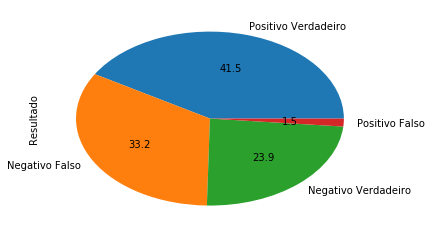

In [411]:
Resultadoss=resposta.Resultado.value_counts(True)*100
Resultadoss.plot(kind='pie',autopct="%0.1f",legend=False)


In [412]:
#Criando classificações intermediárias, se dividirmos Palavras relevantes  por Palavras irrelevantes, podemos criar uma um faixa na qual podemos trabalhar a magnitude de cada frase 
c=0
razao=[]
while c<205:
    razao.append(palavrasrelevantes1[c]/palavrasirrelevantes1[c])
    c=c+1

In [413]:
#Classificamos a relevância dependendo da magnitude da razão
c=0
inter=[]
while c<205:
    if 0.5<razao[c] and razao[c]<5:
        inter.append("Neutro")
    elif 10**-6<razao[c] and razao[c]<0.5:
        inter.append("Irrelevante")
    elif 5<razao[c] and razao[c]<10**6:
        inter.append("Relevante")
    elif razao[c]<=10**-6:
        inter.append("Muito Irrelevante")
    elif 10**6<razao[c]:
        inter.append("Muito Relevante")
    c=c+1
probabilidades = pd.DataFrame({'Palavras relevantes':palavrasrelevantes1,'Palavras irrelevantes':palavrasirrelevantes1,'Pr/Pi':razao,'Classificacao':inter})

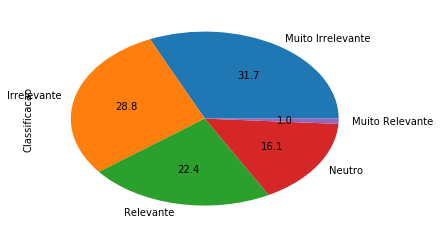

In [414]:
classificacao=probabilidades.Classificacao.value_counts(True)*100
classificacao.plot(kind='pie',autopct="%0.1f",legend=False)

___
## Concluindo

Escreva aqui a sua conclusão.<br /> 
Faça um comparativo qualitativo sobre as medidas obtidas.<br />
Explique como são tratadas as mensagens com dupla negação e sarcasmo.<br />
Proponha um plano de expansão. Por que eles devem continuar financiando o seu projeto?<br />

Opcionalmente: 
* Discorrer por que não posso alimentar minha base de Treinamento automaticamente usando o próprio classificador, aplicado a novos tweets.
* Propor diferentes cenários de uso para o classificador Naive-Bayes. Cenários sem intersecção com este projeto.
* Sugerir e explicar melhorias reais no classificador com indicações concretas de como implementar (não é preciso codificar, mas indicar como fazer e material de pesquisa sobre o assunto).
